<a href="https://colab.research.google.com/github/jimmysoccer/Exercise1/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

In [ ]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
import os
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig

In [ ]:
pip install rioxarray

In [ ]:
pip install geopandas

In [ ]:
pip install tabulate

In [8]:
import rioxarray
import numpy as np
from pyproj import CRS
import geopandas as gpd
import geopandas
import fiona
from shapely.geometry import Polygon
import math
import matplotlib.pyplot as plt
import rasterio
import rtree
from rasterio.plot import show
import pyproj
import tabulate

Exercise 1 Part A (1)Visualization -- visualize seperate RGB colors layers

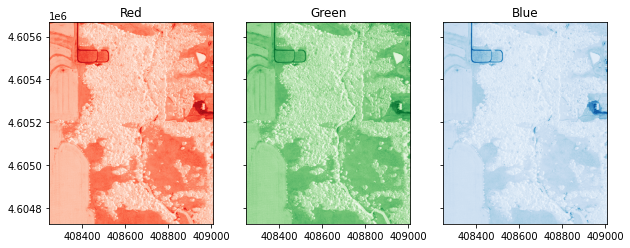

In [9]:
raster=rasterio.open("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

show((raster, 1), cmap='Reds', ax=ax1)
show((raster, 2), cmap='Greens', ax=ax2)
show((raster, 3), cmap='Blues', ax=ax3)

ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")
red = raster.read(1)
green = raster.read(2)
blue = raster.read(3)
redn = (red-red.min())/(red.max()-red.min())
greenn = (green-green.min())/(green.max()-green.min())
bluen = (blue-blue.min())/(blue.max()-blue.min())

Exercise 1 Part A (1)Visualization -- visualize all RGB colors together

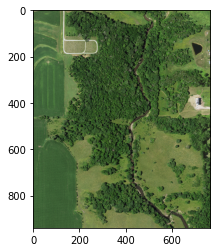

In [10]:
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

Exercise 1 Part A (1)Visualization -- (b)visualize RGB layer together (with polyline on top of raster)

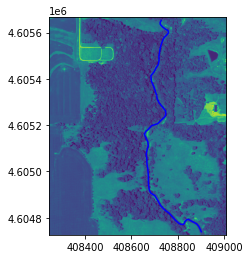

In [ ]:
fig, (ax) = plt.subplots(figsize=(10, 4), sharey=True)
shapefile=gpd.read_file("/content/drive/MyDrive/Lab Data/Ex1_Data/clippedRefinedLines.shp")
new_shapefile=shapefile.to_crs(6370)
show((raster,1),ax=ax)
new_shapefile.plot(ax=ax,color="Blue")

Exercise 1 part A (2) (a)-(e)

In [ ]:
surface_HARV=rioxarray.open_rasterio("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")
print("Spatial reference system for tif file:",surface_HARV.rio.crs)
print("Spatial reference system for shp file:",shapefile.crs)
print("row pixels in raster:",surface_HARV.rio.height)
print("column pixels in raster:",surface_HARV.rio.width)
print("total pixel in raster:",surface_HARV.rio.width*surface_HARV.rio.height)

Spatial reference system for tif file: EPSG:6370
Spatial reference system for shp file: epsg:4269
row pixels in raster: 940
column pixels in raster: 766
total pixel in raster: 720040


In [ ]:
epsg = surface_HARV.rio.crs.to_epsg()
crs = CRS(epsg)
print("spatial extent of raster:",crs.area_of_use.bounds)
print("how many bands:",surface_HARV.shape[0])
print("100 pixels in the seperate layer\nThe first band for the first 100 pixels")
print(surface_HARV.data[0][0][:100])
print("The second band for the first 100 pixels")
print(surface_HARV.data[1][0][:100])
print("The third band for the first 100 pixels")
print(surface_HARV.data[2][0][:100])
print("The forth band for the first 100 pixels")
print(surface_HARV.data[3][0][:100])

spatial extent of raster: (-96.0, 12.1, -90.0, 26.0)
how many bands: 4
100 pixels in the seperate layer
The first band for the first 100 pixels
[113. 111. 126. 125. 120. 130. 117. 112.  99. 102.  97.  99. 101. 117.
 126. 131. 126. 148. 155. 138. 136. 150. 160. 166. 160. 166. 168. 159.
 151. 144. 140. 124. 100.  84.  78.  72.  71.  80.  69.  72.  74.  74.
  80.  71.  89.  77.  71.  75.  68.  67.  76.  80.  77.  67.  73. 111.
 145. 143. 122.  87.  70.  67.  71.  76.  81.  76.  89.  68.  69.  78.
  70.  68.  62.  71.  72.  83.  71.  82.  74.  79.  71.  75.  68.  69.
  75.  69.  83.  85.  69. 100. 112. 114.  95.  76.  72.  77.  71.  85.
  83.  84.]
The second band for the first 100 pixels
[152. 152. 153. 151. 150. 150. 138. 134. 133. 134. 128. 135. 135. 134.
 127. 128. 132. 144. 142. 140. 142. 144. 151. 157. 152. 158. 153. 148.
 139. 133. 132. 129. 112. 116. 114. 105.  95. 112. 101. 102. 105.  97.
 105. 107. 116.  97.  97. 102. 101.  99. 102. 109. 109. 108. 104. 120.
 135. 135. 122. 114. 1

Exercise 1 Part A (2) (f)(g)(h)

In [ ]:
print("spatial extent of the shapefile:\n",shapefile.bounds)
num=0
for item in shapefile.values:
  num=num+len(item[1].coords)
print("how many verticies in the shapefile:\n",num)
print("print coordinates of the first 5 vertices in the shapefile")
for item in shapefile.values[0][1].coords[:5]:
  print(item)

spatial extent of the shapefile:
         minx       miny       maxx       maxy
0 -94.095691  41.594545 -94.094811  41.597390
1 -94.095426  41.594445 -94.095374  41.594545
2 -94.095989  41.589130 -94.092954  41.594445
how many verticies in the shapefile:
 74
print coordinates of the first 5 vertices in the shapefile
(-94.09518899261252, 41.59738960582444)
(-94.09519427407548, 41.597363803615075)
(-94.09523758565778, 41.597296663224064)
(-94.09524256436926, 41.59721558922999)
(-94.09511382174342, 41.597111957835416)


Exercise 1 Part A (3)

In [ ]:
map = rasterio.open("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")

In [ ]:
print("the spatial coordinates of the cell on the 10th row and 11th column\n",map.transform*(10,11))

the spatial coordinates of the cell on the 10th row and 11th column
 (408254.0, 4605655.0)


Exercise 1 Part B

(1)

In [ ]:
shapefile = gpd.read_file("/content/drive/MyDrive/Lab Data/Ex1_Data/clippedRefinedLines.shp");
nodes=[]
for item in shapefile.values:
  for vertices in item[1].coords:
    nodes.append(vertices)
print("for demo only print top 10 vertices:")
for i in nodes[:10]:
  print(i)

for demo only print top 10 vertices:
(-94.09518899261252, 41.59738960582444)
(-94.09519427407548, 41.597363803615075)
(-94.09523758565778, 41.597296663224064)
(-94.09524256436926, 41.59721558922999)
(-94.09511382174342, 41.597111957835416)
(-94.09497278533532, 41.5970322747355)
(-94.09481921339687, 41.596962243382876)
(-94.0948114956646, 41.596881290317924)
(-94.09493018343647, 41.59676576947137)
(-94.09498048781204, 41.59673669271646)


(2)

show buffered lines


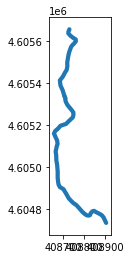

In [ ]:
shapefile = gpd.read_file("/content/drive/MyDrive/Lab Data/Ex1_Data/clippedRefinedLines.shp");
raster = rasterio.open("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")
shapefile=shapefile.to_crs(epsg=6370)
raster_result = rasterio.features.rasterize([(g, 300) for g in shapefile.geometry], out_shape = raster.shape, transform=raster.transform)
buffered_shapefile = shapefile.buffer(10)
print("show buffered lines")
buffered_shapefile.plot()

Exercise 1 Part B (3)

rasterize original polyline shapefile, and visualize the image


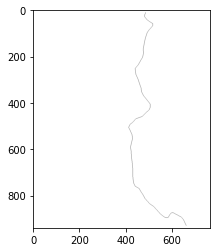

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show
print("rasterize original polyline shapefile, and visualize the image")
shapefile = gpd.read_file("/content/drive/MyDrive/Lab Data/Ex1_Data/clippedRefinedLines.shp");
raster = rasterio.open("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")
shapefile=shapefile.to_crs(epsg=6370)
raster_result = rasterio.features.rasterize([(g, 300) for g in shapefile.geometry], out_shape = raster.shape, transform=raster.transform)
show(raster_result, cmap="binary")
buffered_shapefile = shapefile.buffer(10)

rasterize buffered polyline shapefile, and visualize the image


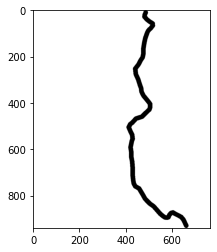

In [ ]:
print("rasterize buffered polyline shapefile, and visualize the image")
buffered_shapefile = shapefile.buffer(10)
raster_buffered_result = rasterio.features.rasterize([(g, 300) for g in buffered_shapefile.geometry], out_shape = raster.shape, transform=raster.transform)
plot=show(raster_buffered_result, cmap="binary")

Exercise 1 Part B (4)

check if stream or non-stream

In [ ]:
surface_HARV=rioxarray.open_rasterio("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")

In [ ]:
class stream_pixels():
  data=[]
  def insert(self,red,green,blue,nir,class_label):
    self.data.append([red,green,blue,nir,class_label])

In [ ]:
class non_stream_pixels():
  data=[]
  def insert(self,red,green,blue,nir,class_label):
    self.data.append([red,green,blue,nir,class_label])

In [ ]:
def ifStream(rindex,cindex,stream):
  if (rindex<10):
    r="00"+str(rindex)
  elif rindex<100:
    r="0"+str(rindex)
  else:
    r=str(rindex)
  if (cindex<10):
    c="00"+str(cindex)
  elif cindex<100:
    c="0"+str(cindex)
  else:
    c=str(cindex)
  index=r+c
  if index in stream:
    return True
  else:
    return False

In [ ]:
stream={"0"}
sPixel={(-1,-1)}
for rindex,row in enumerate(raster_buffered_result):
  for cindex,value in enumerate(row):
    if value!=0:
      if (rindex<10):
        r="00"+str(rindex)
      elif rindex<100:
        r="0"+str(rindex)
      else:
        r=str(rindex)
      if (cindex<10):
        c="00"+str(cindex)
      elif cindex<100:
        c="0"+str(cindex)
      else:
        c=str(cindex)
      index=r+c
      stream.add(index)
s=stream_pixels()
for rindex,row in enumerate(surface_HARV.values[0]):
  for cindex,value in enumerate(row):
    if ifStream(rindex,cindex,stream)==True:
      s.insert(surface_HARV.values[0][rindex][cindex],surface_HARV.values[1][rindex][cindex],
               surface_HARV.values[2][rindex][cindex],surface_HARV.values[3][rindex][cindex],
               raster_buffered_result.astype(bool)[rindex][cindex])

The following is for the stream parts

In [ ]:
from tabulate import tabulate
mydata=s.data[:10]
head=["R","G","B","NIR","Class Label"]
print("Stream class")
print(tabulate(mydata,headers=head,tablefmt="grid"))

The following is for non stream pixels, this will take about 3 minutes to finish

In [ ]:
n=non_stream_pixels()
for rindex,row in enumerate(surface_HARV.values[0]):
  for cindex,value in enumerate(row):
    if ifStream(rindex,cindex,stream)==False:
      n.insert(surface_HARV.values[0][rindex][cindex],surface_HARV.values[1][rindex][cindex],
               surface_HARV.values[2][rindex][cindex],surface_HARV.values[3][rindex][cindex],
               raster_buffered_result.astype(bool)[rindex][cindex])

In [ ]:
mydata=n.data[:10]
head=["R","G","B","NIR","Class Label"]
print("Non stream class")
print(tabulate(mydata,headers=head,tablefmt="grid"))

Non stream class
+-----+-----+-----+-------+---------------+
|   R |   G |   B |   NIR |   Class Label |
+=====+=====+=====+=======+===============+
| 113 | 152 | 101 |   192 |             0 |
+-----+-----+-----+-------+---------------+
| 111 | 152 | 100 |   198 |             0 |
+-----+-----+-----+-------+---------------+
| 126 | 153 | 103 |   199 |             0 |
+-----+-----+-----+-------+---------------+
| 125 | 151 | 107 |   196 |             0 |
+-----+-----+-----+-------+---------------+
| 120 | 150 | 101 |   188 |             0 |
+-----+-----+-----+-------+---------------+
| 130 | 150 | 108 |   187 |             0 |
+-----+-----+-----+-------+---------------+
| 117 | 138 | 101 |   163 |             0 |
+-----+-----+-----+-------+---------------+
| 112 | 134 |  96 |   156 |             0 |
+-----+-----+-----+-------+---------------+
|  99 | 133 |  99 |   153 |             0 |
+-----+-----+-----+-------+---------------+
| 102 | 134 |  94 |   145 |             0 |
+-----+-----+--

Exercise 1 Part C (1)

In [ ]:
def getChunkId(rindex,cindex):
  rmin=715
  chunk_r_id=0
  while True:
    if rindex>rmin:
      break
    else:
      rmin=rmin-224
      chunk_r_id=chunk_r_id+4
  if cindex<224:
    chunk_c_id=1
  else:
    chunk_c_id=math.ceil((cindex+1)/224)
  chunkID=chunk_r_id+chunk_c_id
  return chunkID

In [ ]:
data=[]
for rid,row in enumerate(surface_HARV.values[0]):
  for cid, value in enumerate(row):
    data.append([getChunkId(rid,cid),cid%224,rid%224,0])
    data.append([getChunkId(rid,cid),cid%224,rid%224,1])
    data.append([getChunkId(rid,cid),cid%224,rid%224,2])

In [ ]:
mydata=data[2295:2305]
head=["Chunk ID","width","height","band"]
chunkTable=tabulate(mydata,headers=head,tablefmt="grid")
print(chunkTable)

+------------+---------+----------+--------+
|   Chunk ID |   width |   height |   band |
+============+=========+==========+========+
|         20 |      93 |        0 |      0 |
+------------+---------+----------+--------+
|         20 |      93 |        0 |      1 |
+------------+---------+----------+--------+
|         20 |      93 |        0 |      2 |
+------------+---------+----------+--------+
|         17 |       0 |        1 |      0 |
+------------+---------+----------+--------+
|         17 |       0 |        1 |      1 |
+------------+---------+----------+--------+
|         17 |       0 |        1 |      2 |
+------------+---------+----------+--------+
|         17 |       1 |        1 |      0 |
+------------+---------+----------+--------+
|         17 |       1 |        1 |      1 |
+------------+---------+----------+--------+
|         17 |       1 |        1 |      2 |
+------------+---------+----------+--------+
|         17 |       2 |        1 |      0 |
+---------

Exercise 1 Part C (2)

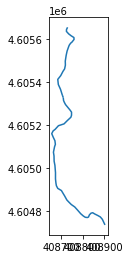

In [ ]:
surface_HARV=rioxarray.open_rasterio("/content/drive/MyDrive/Lab Data/Ex1_Data/Image.tif")
new_shapefile=shapefile.to_crs(6370)
new_shapefile.plot()

In [ ]:
sPixel={(-1,-1,-1)}
for rindex,row in enumerate(surface_HARV.values[0]):
  for cindex,value in enumerate(row):
    if ifStream(rindex,cindex,stream)==True:
      sPixel.add((getChunkId(rindex,cindex),rindex,cindex))
readPixel={-1}
for item in sPixel:
  if item[0] not in readPixel:
    readPixel.add(item[0])
readPixel.remove(-1)
sPixel=readPixel

In [ ]:
def getChunkCoord(chunkID):
  xmin=(chunkID-1)%4*224
  xmax=((chunkID)%4)*224-1
  ymin=int((chunkID-1)/4)*224
  ymax=math.ceil(chunkID/4)*224-1
  if xmax>765 or chunkID%4==0:
    xmax=765
  if ymax>939:
    ymax=939
  return (xmin+408244,xmax+408244,ymin+4604726,ymax+4604726)

In [ ]:
from shapely.geometry import Polygon
smallChunk=[]
for item in sPixel:
  xmin=getChunkCoord(item)[0]
  xmax=getChunkCoord(item)[1]
  ymin=getChunkCoord(item)[2]
  ymax=getChunkCoord(item)[3]
  smallChunk.append(Polygon([(xmin,ymin),(xmin,ymax),(xmax,ymax),(xmax,ymin),(xmin,ymin)]))
polygon=[]
for i in range(-1,len(smallChunk)):
  polygon.append(geopandas.GeoDataFrame([1], geometry=[smallChunk[i]], crs=shapefile.crs))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6370
Right CRS: EPSG:4269

  


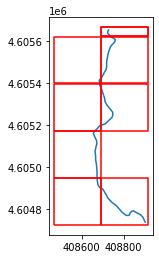

In [ ]:
shapefile = gpd.read_file("/content/drive/MyDrive/Lab Data/Ex1_Data/clippedRefinedLines.shp");
new_shapefile=shapefile.to_crs(6370)
fig, (ax1) = plt.subplots()
new_shapefile.plot(ax=ax1)
for i in range(0,len(polygon)):
  polygon[i].boundary.plot(ax=ax1, color="red",aspect=1)
for i in range(0,len(polygon)):
  temp=geopandas.clip(new_shapefile, polygon[i])
  file_name="clip"+str(i)+".shp"
  temp.to_file(file_name)